In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([0, 0])
x2 = np.array([15, 10])
p = [i for i in range(1, 15)]
dist =  []

for i in range(1, 15):
    dist.append(np.power(sum((abs(x1 - x2))**i), 1/i))
    
plt.plot(p, dist)
plt.xlabel('p')
plt.ylabel('Distance')
plt.grid()
plt.show()

In [4]:
import boto3
import pandas as pd
import numpy as np

## Defining the s3 bucket
s3 = boto3.resource('s3')
bucket_name = 'data-445'
bucket = s3.Bucket(bucket_name)

## Defining the file to be read from s3 bucket
file_key = 'Chapter7/Credit_Card_Clustering.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading the csv file
credit_card = pd.read_csv(file_content_stream)

## Removing observation with NaN
credit_card = credit_card.dropna()
credit_card.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

## Selecting variables of interest
X = credit_card.drop(['CUST_ID'], axis = 1)

## Standardizing the data 
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

## Fitting the k-NN 
knn_md = NearestNeighbors(n_neighbors = 10, algorithm = 'brute').fit(X)

## Selecting the 100 data-point
x_100 = X[99, :]

## Finding the 10-nearest neighbors of x_100
knn_md.kneighbors([x_100])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

## Selecting variables of interest
X = credit_card.drop(['CUST_ID'], axis = 1)

## Standardizing the data 
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

## Fitting the k-NN 
knn_md = NearestNeighbors(n_neighbors = 10, algorithm = 'kd_tree').fit(X)

## Selecting the 100 data-point
x_100 = X[99, :]

## Finding the 10-nearest neighbors of x_100
knn_md.kneighbors([x_100])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

## Selecting variables of interest
X = credit_card.drop(['CUST_ID'], axis = 1)

## Standardizing the data 
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

## Fitting the k-NN 
knn_md = NearestNeighbors(n_neighbors = 10, algorithm = 'ball_tree').fit(X)

## Selecting the 100 data-point
x_100 = X[99, :]

## Finding the 10-nearest neighbors of x_100
knn_md.kneighbors([x_100])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

## Selecting variables of interest
X = credit_card.drop(['CUST_ID'], axis = 1)

## Standardizing the data 
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

## Fitting k-means with 5 clusters
kmeans_md = KMeans(n_clusters = 5, init = 'random', n_init = 20).fit(X)

## Extracting cluster labels
kmeans_md.labels_

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

## Selecting variables of interest
X = credit_card.drop(['CUST_ID'], axis = 1)

## Standardizing the data 
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

## Fitting k-means with 5 clusters
kmeans_plus_plus_md = KMeans(n_clusters = 5, init = 'k-means++', n_init = 20).fit(X)

## Extracting cluster labels
kmeans_plus_plus_md.labels_

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

## Selecting variables of interest
X = credit_card.drop(['CUST_ID'], axis = 1)

## Standardizing the data 
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

## Fitting k-means with 5 clusters
kmeans_plus_plus_md = KMeans(n_clusters = 5, init = 'k-means++', n_init = 20).fit(X)

## Computing the CH score
CH_score = calinski_harabasz_score(X, kmeans_plus_plus_md.labels_)
CH_score

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

## Selecting variables of interest
X = credit_card.drop(['CUST_ID'], axis = 1)

## Standardizing the data 
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

## Fitting k-means with 5 clusters
kmeans_plus_plus_md = KMeans(n_clusters = 5, init = 'k-means++', n_init = 20).fit(X)

## Computing the CH score
DB_score = davies_bouldin_score(X, kmeans_plus_plus_md.labels_)
DB_score

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Selecting variables of interest
X = credit_card.drop(['CUST_ID'], axis = 1)

## Standardizing the data 
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

## Fitting k-means with 5 clusters
kmeans_plus_plus_md = KMeans(n_clusters = 5, init = 'k-means++', n_init = 20).fit(X)

## Computing the CH score
silhouette_score = silhouette_score(X, kmeans_plus_plus_md.labels_)
silhouette_score

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

## Selecting variables of interest
X = credit_card.drop(['CUST_ID'], axis = 1)

## Standardizing the data 
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

## Defining the number of clusters to be considered
krange = list(range(2, 20))

## Defining lists to store scores
CH_scores, DB_scores, silhouette_scores = list(), list(), list() 

for i in krange:
    
    ## Here we define the k-means model
    cluster_md = KMeans(n_clusters = i, n_init = 20).fit(X)
    cluster_assignments = cluster_md.labels_
    
    ## Here we extract CH, DB and silhoutte scores
    CH = calinski_harabasz_score(X, cluster_assignments)
    DB = davies_bouldin_score(X, cluster_assignments)
    silhouette = silhouette_score(X, cluster_assignments)
    
    ## Storing scores
    CH_scores.append(CH)
    DB_scores.append(DB)
    silhouette_scores.append(silhouette)
    
## Visualizing the scores    
fig, axs = plt.subplots(1, 3, figsize = (15, 6))
axs[0].plot(krange, CH_scores)
axs[0].set_xlabel('Number of Clusters (k)')
axs[0].set_ylabel('CH-Score')
axs[0].grid()

axs[1].plot(krange, DB_scores)
axs[1].set_xlabel('Number of Clusters (k)')
axs[1].set_ylabel('DB-Score')
axs[1].grid()

axs[2].plot(krange, silhouette_scores)
axs[2].set_xlabel('Number of Clusters (k)')
axs[2].set_ylabel('Silhouette-Score')
axs[2].grid()

fig.savefig('chapter7_plot2.pdf')

In [2]:
## Installing scikit-fuzzy 
pip install -U scikit-fuzzy

     |████████████████████████████████| 993 kB 13.3 MB/s eta 0:00:01
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894069 sha256=78b35e444bcceb57a9b6efab6cb1413c140cf79e036b0dd74b862ff6b6df119b
  Stored in directory: /home/ec2-user/.cache/pip/wheels/31/1e/58/db8cfe08f81c72d8c31bc58690ce63d9e3d93a6e97dca5ddb4
Successfully built scikit-fuzzy
Note: you may need to restart the kernel to use updated packages.


In [26]:
from sklearn.preprocessing import MinMaxScaler
from skfuzzy.cluster import cmeans

## Selecting variables of interest
X = credit_card.drop(['CUST_ID'], axis = 1)

## Standardizing the data 
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

## Fitting Fuzzy C-means with 5 clusters
fc, W, u0, d, jm, p, pc = cmeans(X.T, c = 5, m = 1.25, error = 1e-6, maxiter = 1000)

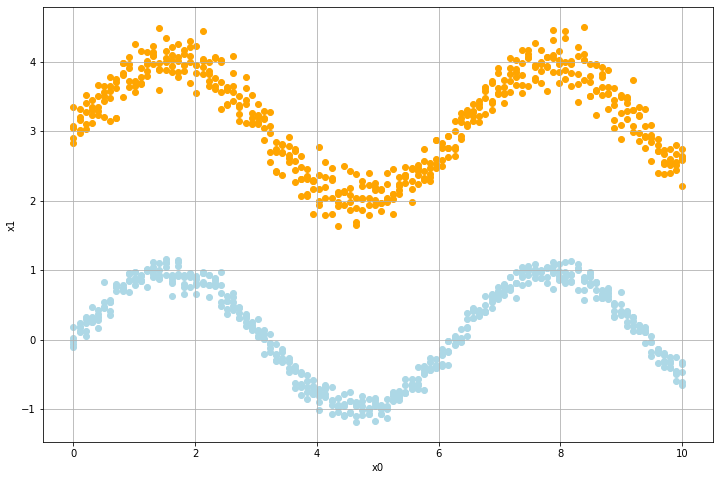

In [56]:
x = np.linspace(start = 0, stop = 10, num = 100)
y1 = np.sin(x) + np.random.normal(loc = 0, scale = 0.1, size = 100)
y2 = np.sin(x) + np.random.normal(loc = 0, scale = 0.1, size = 100)
y3 = np.sin(x) + np.random.normal(loc = 0, scale = 0.1, size = 100)
y4 = np.sin(x) + np.random.normal(loc = 0, scale = 0.1, size = 100)
y5 = np.sin(x) + np.random.normal(loc = 0, scale = 0.1, size = 100)

z1 = np.sin(x) + np.random.normal(loc = 0, scale = 0.2, size = 100) + 3
z2 = np.sin(x) + np.random.normal(loc = 0, scale = 0.2, size = 100) + 3
z3 = np.sin(x) + np.random.normal(loc = 0, scale = 0.2, size = 100) + 3
z4 = np.sin(x) + np.random.normal(loc = 0, scale = 0.2, size = 100) + 3
z5 = np.sin(x) + np.random.normal(loc = 0, scale = 0.2, size = 100) + 3


import matplotlib.pyplot as plt
plt.figure(figsize =(12,8))
plt.scatter(x, y1, color = 'lightblue')
plt.scatter(x, y2, color = 'lightblue')
plt.scatter(x, y3, color = 'lightblue')
plt.scatter(x, y4, color = 'lightblue')
plt.scatter(x, y5, color = 'lightblue')

plt.scatter(x, z1, color = 'orange')
plt.scatter(x, z2, color = 'orange')
plt.scatter(x, z3, color = 'orange')
plt.scatter(x, z4, color = 'orange')
plt.scatter(x, z5, color = 'orange')

plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.savefig('chapter7_plot4.pdf')